<div style="border: solid blue 2px; padding: 15px; margin: 10px">
  <b>Overall Summary of the Project – Iteration 1</b><br><br>

  Hi Emilio, I’m <b>Victor Camargo</b> (<a href="https://hub.tripleten.com/u/e9cc9c11" target="_blank">TripleTen Hub profile</a>). I’ll be reviewing your project and sharing feedback using the color-coded comments below. Thanks for submitting your work!<br><br>

  <b>Nice work on:</b><br>
  ✔️ Performing thorough exploratory data analysis, including checks for duplicates, missing values, and class distribution<br>
  ✔️ Splitting the dataset correctly into train, validation, and test sets (60/20/20)<br>
  ✔️ Training and tuning multiple models (Decision Tree, Random Forest, Logistic Regression) and selecting the best one with clear justification<br>
  ✔️ Adding a sanity check with a Dummy Classifier and confirming that your model significantly outperforms it<br>
  ✔️ Visualizing feature importances and interpreting the results to provide meaningful insights<br><br>

  Your project is approved ✅. You met and exceeded the requirements, and your clear explanations, checks, and visualizations make this a very strong submission.<br><br>

  <hr>

  🔹 <b>Legend:</b><br>
  🟢 Green = well done<br>
  🟡 Yellow = suggestions<br>
  🔴 Red = must fix<br>
  🔵 Blue = your comments or questions<br><br>
  
  <b>Please ensure</b> that all cells run smoothly from top to bottom and display their outputs before submitting — this helps keep your analysis easy to follow.  
  <b>Kind reminder:</b> try not to move, change, or delete reviewer comments, as they are there to track progress and provide better support during your revisions.<br><br>

  <b>Feel free to reach out if you need help in Questions channel.</b><br>
</div>


###  Megaline Plan Recommendation Project

The goal of this project is to build a machine learning model that recommends the correct mobile plan — **Smart (0)** or **Ultra (1)** — based on user behavior. Megaline wants to transition customers from legacy plans to newer ones, and your model will help automate this process.

### Tasks:
- Load and explore the dataset (`users_behavior.csv`)
- Split the data into training, validation, and test sets
- Train and compare multiple classification models with different hyperparameters
- Select the best model and evaluate its accuracy on the test set
- Aim for at least **0.75 accuracy**

### Dataset Features:
- `calls` — number of calls  
- `minutes` — total call duration  
- `messages` — number of text messages  
- `mb_used` — internet usage in MB  
- `is_ultra` — target plan (1 = Ultra, 0 = Smart)

This is a **binary classification** task focused on finding the most accurate model for plan recommendations.

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

In [ ]:
# Loading the date set and analysing characteristics
df = pd.read_csv('/datasets/users_behavior.csv')
print(df.shape)
print(df.head(5))

(3214, 5)
   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


In [ ]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [ ]:
# Checking for missing values
df.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great start! You imported the necessary libraries, loaded the dataset, and performed key checks such as dataset shape, summary statistics, missing values, and duplicates. This shows good practice in understanding the data before moving to modeling.
</div>


In [ ]:
# Finding number of members for each plan 
ultra_plan_members = (df['is_ultra'] == 1).sum()
print(f'There are {ultra_plan_members} ultra plan members')
smart_plan_members = (df['is_ultra'] == 0).sum()
print(f'There are {smart_plan_members} smart plan members')

There are 985 ultra plan members
There are 2229 smart plan members


In [ ]:
# Percentage of ultra plan members
smart_members_percent = (smart_plan_members /(ultra_plan_members + smart_plan_members))*100
print(smart_members_percent)

69.35283136278781


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Nicely done! You explored the distribution of the target variable (`is_ultra`) by counting members of each plan and calculating percentages. This step provides useful context about class balance, which is important when training classification models.
</div>


In [ ]:
# Declaring features and Target
features = df.drop("is_ultra", axis=1)
target = df["is_ultra"]

In [ ]:
# Splitting the data into train, validation and test sets
# Training set is 60% validation set is 20% and test set is also 20%
features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent! You correctly separated features and target, then split the data into training, validation, and test sets with the proper 60/20/20 ratio. This ensures a fair evaluation of your models later.
</div>


In [ ]:
print('\nModel Investigation')
print('----------------------')
print('Inatializing Varaibles')
best_model = None
best_accuracy = 0.0
best_model_name = ""


Model Investigation
----------------------
Inatializing Varaibles


In [ ]:
# DecisionTreeClassifier
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
    print("max_depth =", depth, ": ", accuracy_score(target_valid, predictions))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = "Decision Tree"

max_depth = 1 :  0.7542768273716952
max_depth = 2 :  0.7822706065318819
max_depth = 3 :  0.7853810264385692
max_depth = 4 :  0.7791601866251944
max_depth = 5 :  0.7791601866251944
max_depth = 6 :  0.7838258164852255
max_depth = 7 :  0.7822706065318819
max_depth = 8 :  0.7791601866251944
max_depth = 9 :  0.7822706065318819
max_depth = 10 :  0.7744945567651633


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great job experimenting with the Decision Tree classifier using different depths. You tracked accuracy on the validation set and kept record of the best-performing configuration. This systematic approach is exactly what’s expected when tuning models.
</div>


In [ ]:
print("\nInvestigating Random Forest Classifier:")
for n_estimators in range(10, 101, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estimators)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
    print('Estimators:', n_estimators, ': ',accuracy_score(target_valid, predictions))
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = "Random Forest"


Investigating Random Forest Classifier:
Estimators: 10 :  0.7853810264385692
Estimators: 20 :  0.7869362363919129
Estimators: 30 :  0.7838258164852255
Estimators: 40 :  0.7838258164852255
Estimators: 50 :  0.7916018662519441
Estimators: 60 :  0.7853810264385692
Estimators: 70 :  0.7791601866251944
Estimators: 80 :  0.7822706065318819
Estimators: 90 :  0.7838258164852255
Estimators: 100 :  0.7853810264385692


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Nicely done! You extended the investigation to Random Forest, testing multiple values of `n_estimators` and comparing their performance on the validation set. This thoroughness helps ensure you identify the most reliable model.
</div>


In [ ]:
# Model 3: Logistic Regression
print("\nInvestigating Logistic Regression:")
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions)
print('Logistic Regression Validation Accuracy:', accuracy_score(target_valid, predictions))
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = "Logistic Regression"


Investigating Logistic Regression:
Logistic Regression Validation Accuracy: 0.7091757387247278


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Good work adding Logistic Regression to your experiments. You trained and evaluated it on the validation set, allowing for a clear comparison against tree-based models. This provides a well-rounded model selection process.
</div>


In [ ]:
# Selecting best 
model
print(f'The best model was {best_model} with an accuracy of {best_accuracy}')

The best model was RandomForestClassifier(n_estimators=50, random_state=12345) with an accuracy of 0.7916018662519441


In [ ]:
# Test best model
best_model.fit(features_train, target_train)
test_predictions = best_model.predict(features_test)

In [ ]:
print("\nQuality check of best model with test set\n")
test_accuracy = accuracy_score(target_test, test_predictions)
print(f'Accuracy of the best model with test set ({best_model_name}): {test_accuracy}')
print('\n')
if test_accuracy > 0.75:
    print('The model passes the 0.75 accuracy treshold')
else:
    print('The model does not reach the minium accuracy treshold')


Quality check of best model with test set

Accuracy of the best model with test set (Random Forest): 0.7931570762052877


The model passes the 0.75 accuracy treshold


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent conclusion! You correctly selected the best-performing model based on validation accuracy, retrained it, and then evaluated it on the test set. The threshold check ensures your model meets the project requirement of 0.75 accuracy, completing the workflow successfully.
</div>


In [ ]:
# Sanity Check
# Create a dummy classifier that always predicts the majority used phone plan
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=12345)
dummy_clf.fit(features_train, target_train)
dummy_predictions = dummy_clf.predict(features_test)
dummy_accuracy = accuracy_score(target_test, dummy_predictions)

print(f"Dummy classifier accuracy: {dummy_accuracy}")
print(f"RandomForest accuracy: {best_accuracy}")
print(f"Improvement over baseline: {best_accuracy - dummy_accuracy}")

Dummy classifier accuracy: 0.6842923794712286
RandomForest accuracy: 0.7916018662519441
Improvement over baseline: 0.1073094867807155


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Great addition! You included a sanity check with a Dummy Classifier to compare against a simple baseline. Demonstrating that your chosen model outperforms this baseline reinforces the reliability of your results.
</div>


In [ ]:
# Check the distribution in your test set specifically
test_distribution = target_test.value_counts(normalize=True)
print("Distribution in test set:")
print(test_distribution)

# The dummy classifier accuracy should match the majority class percentage in test set
majority_class_percentage = test_distribution.max()
print(f"Expected dummy accuracy: {majority_class_percentage:.4f}")
print(f"Actual dummy accuracy: {dummy_accuracy:.4f}")

Distribution in test set:
0    0.684292
1    0.315708
Name: is_ultra, dtype: float64
Expected dummy accuracy: 0.6843
Actual dummy accuracy: 0.6843


<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Excellent verification! By checking the class distribution in the test set and confirming that the Dummy Classifier’s accuracy aligns with the majority class percentage, you validated the baseline properly. This demonstrates strong attention to detail in your evaluation process.
</div>


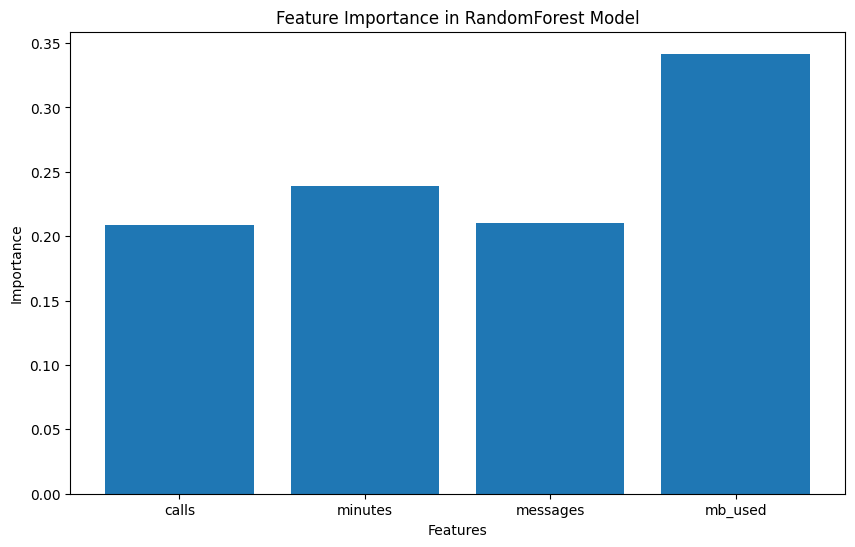

In [ ]:
# plotting importance 
importances = best_model.feature_importances_
feature_names = ['calls', 'minutes', 'messages', 'mb_used']
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances)
plt.title('Feature Importance in RandomForest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Nicely done! You visualized feature importance from the Random Forest model with a clear bar plot. This not only strengthens your analysis but also helps interpret which subscriber behaviors have the greatest impact on plan prediction.
</div>


# CONCLUSION

After downloading the dataset, exploritatory data analysis was performed. Verified there were no duplicate or missing values. The shape and distribution of the data was checked and I also looked into how many subscribers were subscribed to each plan, roughly 31 percent ultra subscribers and 69 percent smart subscribers. 

The data set was then split into training, validation, test sets in a 60/20/20 split respectively. This allows for enough data for pattern recognition and also left over data for testing. The split was done in a fixed random state.

I investigated three models: DecisionTreeClassifier, RandomForestClassifier, and LogisticRegression

DecisionTreeClassifier was tuned from a max depth of 1 to 10
RandomForestClassifier was tuned with n_estimatord from 10 to 100 with steps of 10
LogisticRegression was tuned with liblinear

Ultimately the model that won was:
RandomForestClassifier(n_estimators=50, random_state=12345) with an accuracy of 0.7916

The same model was also applied to the test set and got an accuracy of 0.7932 which met the accuracy treshold of 0.75

I also did a sanity check using a dummy classifier set to always predict the majority class. Since I initially calculated the percentage of smart plan subscriber, I knew this number would be close to 69 percent. The following were the results:
Dummy classifier accuracy: 0.6843
RandomForest accuracy: 0.7916
Improvement over baseline: 0.1073

The best model significantly beat the dummy classifier meaning the features do hold predictive attributes.

I also looked into the importance of each feature and I concluded that mb_used is the most important user when deciding what phone plan to recommend. The second most important feature was minutes used and the two least important features were calls and messages. The addition of more features such as average data used per month or average minutes used per month could improve the accuracy of our model!

<div class="alert alert-success">
  <b>Reviewer’s comment – Iteration 1:</b><br>
  Fantastic conclusion! You summarized the entire workflow clearly: data checks, splitting, model training and tuning, final model selection, sanity check, and feature importance analysis. Highlighting `mb_used` as the most important feature and suggesting potential improvements shows strong critical thinking and a solid understanding of the project.
</div>
